# K-Means Clustering

First, let's create an artificial dataset.

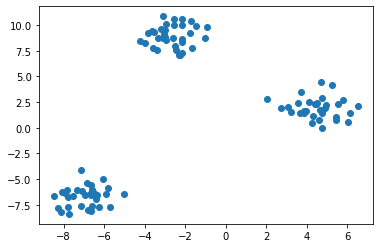

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(random_state=42)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [21]:
print(y)

[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


Use K-Means to group the points into 3 clusters

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.labels_

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

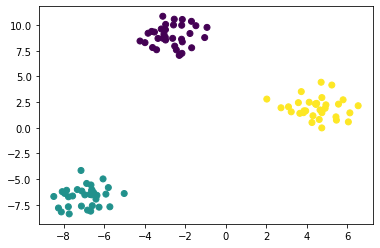

In [23]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()

Hard clustering vs soft clustering

In [24]:
kmeans.transform(X)

array([[18.05390194,  1.88527059, 16.00819788],
       [11.53631653, 14.45410379,  1.53028934],
       [ 0.69454024, 16.71219189, 10.67501773],
       [12.0762702 , 14.8788693 ,  2.06196177],
       [15.73439653,  0.55871251, 13.77202839],
       [ 9.82804684, 13.33111504,  1.00292573],
       [ 1.16234122, 17.33626505, 10.45970511],
       [ 9.68876893, 14.50646441,  0.39931603],
       [ 9.52669219, 15.13708824,  1.03062033],
       [ 1.09139886, 16.39990558, 11.04984519],
       [ 0.42978367, 16.27514844, 10.4255416 ],
       [15.04587404,  1.14319109, 13.44575589],
       [15.95152148,  0.60127413, 13.80231679],
       [ 1.46540127, 14.87328811, 10.02089973],
       [ 0.93122855, 16.68656627,  9.58285347],
       [16.21789678,  1.03693207, 14.98337169],
       [15.49664501,  0.71423639, 13.67969027],
       [ 1.08551791, 17.25665423, 10.74267989],
       [16.47023841,  0.81332372, 15.01560992],
       [16.32261574,  0.61151363, 14.07138214],
       [ 0.49278511, 15.73616556,  9.975

How many clusters?

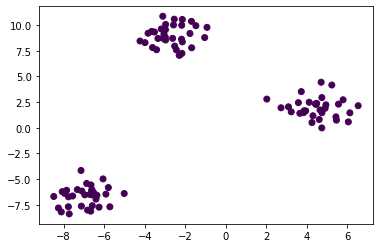

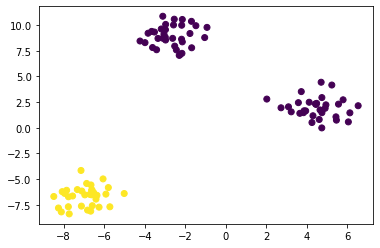

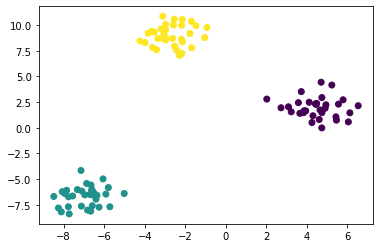

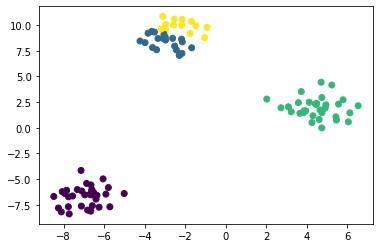

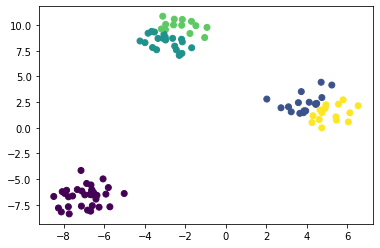

In [26]:
def cluster_and_plot(n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
    plt.show()
    
cluster_and_plot(1)
cluster_and_plot(2)
cluster_and_plot(3)
cluster_and_plot(4)
cluster_and_plot(5)

The "elbow" method

In [35]:
inertia = {}

for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia[n_clusters] = kmeans.inertia_
    
print(inertia)

{1: 6474.444504249192, 2: 1851.9999269755135, 3: 171.91098459057724, 4: 145.73896794548236, 5: 123.58473950637911, 6: 106.46569440198192, 7: 89.1913800175631, 8: 79.10991471546438, 9: 66.71755678190502}


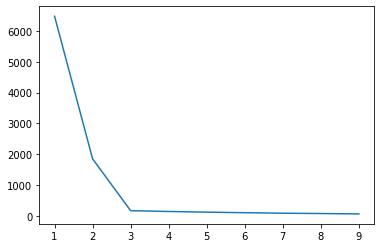

In [43]:
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.show()

Let's try it for a larger number of clusters

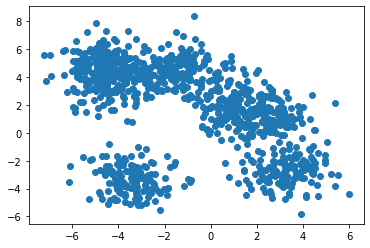

In [80]:
import random
clusters = random.randint(2, 10)
X, _ = make_blobs(n_samples=1000, random_state=42, centers=clusters, center_box=(-5, 5))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [81]:
inertia = {}

for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia[n_clusters] = kmeans.inertia_
    
print(inertia)

{1: 20635.28312414666, 2: 9786.867956126045, 3: 5140.316069596205, 4: 3012.7049883067425, 5: 2105.8441301400235, 6: 1832.4916790979107, 7: 1580.3525492135625, 8: 1438.0378428391475, 9: 1335.3888474866546, 10: 1232.90451323673, 11: 1128.9578991416965, 12: 1048.5378049249641, 13: 978.6344272019531, 14: 907.6671530693262}


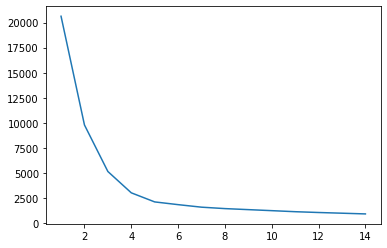

In [82]:
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.show()

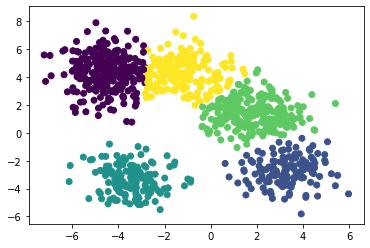

In [85]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()

Using the silhouette score

In [88]:
from sklearn.metrics import silhouette_score
score = {}

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    score[n_clusters] = silhouette_score(X, kmeans.labels_)
    
print(score)

{2: 0.4789825688395574, 3: 0.5657541953998677, 4: 0.5726939919574782, 5: 0.5226048627890776, 6: 0.4728087651475003, 7: 0.43819080898854934, 8: 0.43113623945960955, 9: 0.38069928179007306, 10: 0.3497497941706157, 11: 0.34144203743659285, 12: 0.34170186963496313, 13: 0.3360462095576776, 14: 0.34282534126512954}


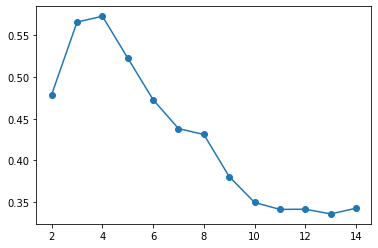

In [91]:
plt.plot(list(score.keys()), list(score.values()), marker='o')
plt.show()

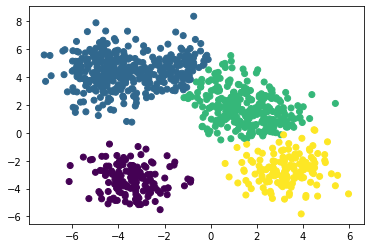

In [93]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()

Where K-Means doesn't work

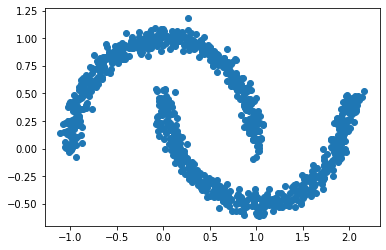

In [94]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
plt.scatter(X[:,0], X[:,1])
plt.show()

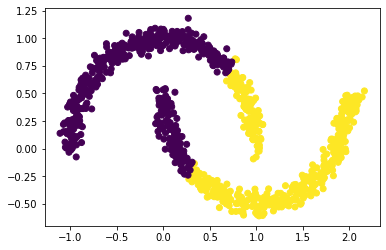

In [95]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()